* 归一化解释

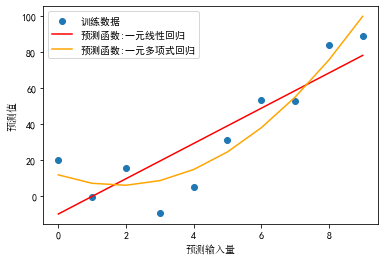

In [16]:
# 模拟一元多项式回归
# 添加[合理]杂质 
# ==>一元多项式更合理
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SimHei']
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler,MaxAbsScaler

# 生成模拟数据 y = 10.5 - 2.4 *x + 1.4 * x^2  -7.2
#添加干扰项
impurity_x = np.arange(0, 10, 1).reshape(-1, 1) 
impurity_y = 10.5 - 2.4 * impurity_x + 1.4 * impurity_x ** 2 - 7.2   + np.random.uniform(-20, 20, impurity_x.shape)
# 添加不合理突变量
# impurity_y[6,0] = impurity_y[6,0]-200
# impurity_y[7,0] = impurity_y[7,0]-150
# impurity_y[9,0] = impurity_y[9,0]+100
train_x =impurity_x[:,:]
train_y =impurity_y[:,:]

# 没有做数据 归一化处理
# 得到的预测结果收到杂质相影响较大
def show1():
  plt.scatter(train_x, train_y, label='训练数据')
  # 一元线性回归
  model = LinearRegression()
  model.fit(train_x, train_y)
  line_x = np.arange(0, 10, 1).reshape(-1, 1)
  line_y = model.predict(line_x)
  plt.plot(line_x, line_y, label='预测函数:一元线性回归',c='r')
  # 一元多项式回归
  quad_model = PolynomialFeatures(degree=2)
  train_x_quad = quad_model.fit_transform(train_x)
  model2 = LinearRegression()
  model2.fit(train_x_quad, train_y)

  test_x = np.arange(0, 10,1).reshape(-1, 1)
  quad_test_x = quad_model.fit_transform(test_x)
  test_y = model2.predict(quad_test_x)
  plt.plot(test_x, test_y, label='预测函数:一元多项式回归',c='orange')
  plt.xlabel('预测输入量', fontproperties="SimSun")
  plt.ylabel('预测值', fontproperties="SimSun")
  plt.legend()
  plt.show()
  pass

# 数据处理 - 归一化
def show2():
  plt.scatter(train_x, train_y, label='训练数据')
  # 一元线性回归
  model = LinearRegression()
  scaler = StandardScaler()
  print(scaler.fit_transform(train_x))
  model.fit(train_x, train_y)

  line_x = np.arange(0, 10, 1).reshape(-1, 1)
  line_y = model.predict(line_x)
  plt.plot(line_x, line_y, label='预测函数:一元线性回归',c='r')
  plt.show()
  pass
show1()
# show2()

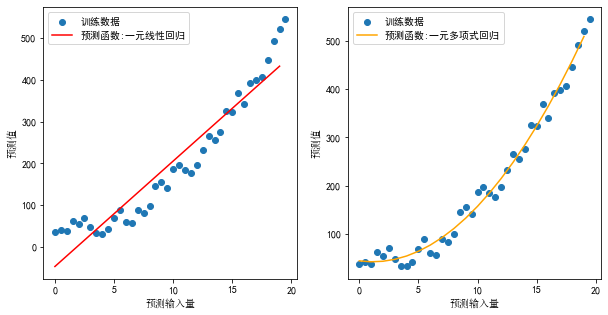

In [37]:
# 模拟一元多项式回归
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']

# 生成模拟数据 y = 10.5 - 2.4 *x + 1.4 * x^2  + 30
impurity_x = np.arange(0, 20, 0.5).reshape(-1, 1)
impurity_y = 10.5 - 2.4 * impurity_x + 1.4 * impurity_x ** 2 + \
    30 + np.random.uniform(-30, 30, impurity_x.shape)
train_x = impurity_x[:, :]
train_y = impurity_y[:, :]

def showLine1():
    plt.subplot(121)
    plt.scatter(train_x, train_y, label='训练数据')
    # 一元线性回归
    model = LinearRegression()
    model.fit(train_x, train_y)
    line_x = np.arange(0, 20, 1).reshape(-1, 1)
    line_y = model.predict(line_x)
    plt.plot(line_x, line_y, label='预测函数:一元线性回归', c='r')
    plt.xlabel('预测输入量', fontproperties="SimSun")
    plt.ylabel('预测值', fontproperties="SimSun")
    plt.legend()


def showLine2():
    plt.subplot(122)
    # 一元多项式回归
    quad_model = PolynomialFeatures(degree=2)
    train_x_quad = quad_model.fit_transform(train_x)
    model2 = LinearRegression()
    model2.fit(train_x_quad, train_y)

    test_x = np.arange(0, 20, 1).reshape(-1, 1)
    quad_test_x = quad_model.fit_transform(test_x)
    test_y = model2.predict(quad_test_x)
    plt.scatter(train_x, train_y, label='训练数据')
    plt.plot(test_x, test_y, label='预测函数:一元多项式回归', c='orange')
    plt.xlabel('预测输入量', fontproperties="SimSun")
    plt.ylabel('预测值', fontproperties="SimSun")
    plt.legend()

plt.figure(figsize=(10, 5))
showLine1()
showLine2()
plt.show()
